<a href="https://colab.research.google.com/github/ab-rohman/Computer_Vision/blob/main/SIAP_PRESENTASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [169]:
# function to display 1 image
def display_one(a, title1 = "Original"):
    plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.show()

# function to display 2 image
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show() 

### **CAR DETECTION USING COLOR**

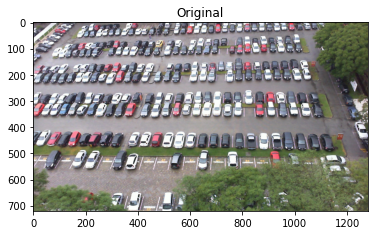

In [161]:
image = cv2.imread("/content/drive/MyDrive/PCVK/CAR/20.jpg")
color = 'w'
display_one(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [170]:
#BGR
if color == 'r':
  lower_color_bounds = np.array([20,20,100])
  upper_color_bounds = np.array([150,100,255])
elif color == 'w':  
  lower_color_bounds = np.array([240,240,240])
  upper_color_bounds = np.array([255,255,255])
elif color == 'b':  
  lower_color_bounds = np.array([5,5,5])
  upper_color_bounds = np.array([90,90,90])  
else:  
  print('INVALID COLOR')

#cv.inRange(	src, lowerb, upperb)
mask = cv2.inRange(image,lower_color_bounds,upper_color_bounds)

#numpy.ones(shape, dtype=None, order='C', *, like=None)
kernel = np.ones((10,10),np.float32)/100

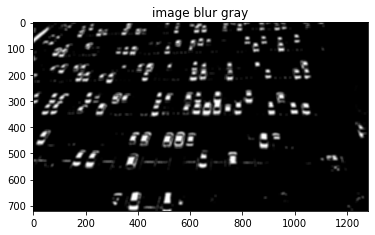

In [171]:
#in this step we bluring the image while automaticaly set the image to grayscale
#cv2.filter2D(src, ddepth, kernel)
image_blur_gray = cv2.filter2D(mask,-1,kernel)
display_one(image_blur_gray,'image blur gray')

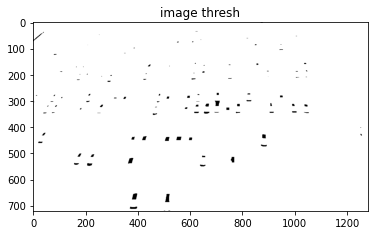

In [172]:
#treshold = binary representation of the image.
#parameter(src should be gray scale, threshold value, maximum value which is assigned to pixel values exceeding the threshold,  provides different types of thresholding)
image_res ,image_thresh = cv2.threshold(image_blur_gray,240,255,cv2.THRESH_BINARY_INV)

#intinya step tresholding itu untuk mengconvert jadi binary value
display_one(image_thresh,'image thresh')

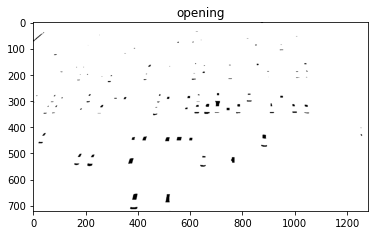

In [173]:
#np.ones (buat numpy array 2 baris 2 column, dengan type int8)
kernel = np.ones((2,2),np.uint8)

#opening itu di erosi dulu (dikurangi) baru didilatasi (ditambah)
#Opening involves erosion followed by dilation in the outer surface (the foreground) of the image
#parameter morphology (src, type operation, kernel)
opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel)   
display_one(opening,'opening')

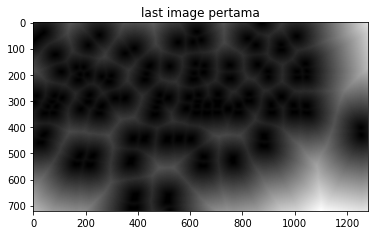

In [174]:
#parameter distance(src, type, masksize)
#distanctT used in order to obtain the derived representation of a binary image, where the value of each pixel is replaced by its distance to the nearest background pixel
last_image = cv2.distanceTransform(opening,cv2.DIST_L2,5)

display_one(last_image,'last image pertama')

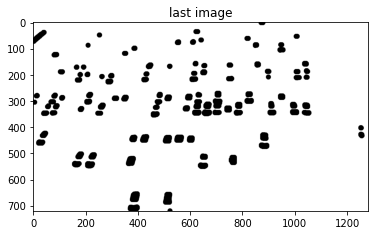

In [175]:
ret, last_image =  cv2.threshold(last_image, 0.03*last_image.max(),255,0)

display_one(last_image,'last image')

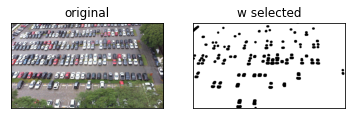

100


In [176]:
last_image = last_image.astype(np.uint8)
cnts = cv2.findContours(last_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]

display(cv2.cvtColor(image,cv2.COLOR_BGR2RGB),last_image,'original','{} selected'.format(color))
print(len(cnts)-1)

### **CAR CLASSIFICATION**

69


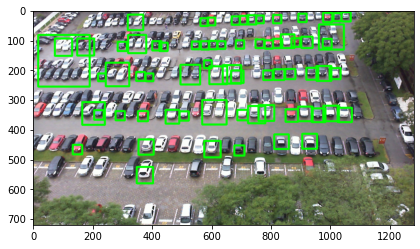

In [159]:
# Create our body classifier
test_image1 = cv2.imread('/content/drive/MyDrive/PCVK/CAR/20.jpg')
car_counter = 0
car_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/xml/car2.xml')
car_rects = car_classifier.detectMultiScale(test_image1, scaleFactor = 1.2, minNeighbors = 5);
for (x,y,w,h) in car_rects:
     cv2.rectangle(test_image1, (x, y), (x+w, y+h), (0, 255, 0), 5)
     car_counter = car_counter+1

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# resize image
f, axarr = plt. subplots(figsize=(15,10))
plt.subplot(121),plt.imshow(convertToRGB(test_image1))
print(car_counter)

### **CAR LOCATION USING IMAGE MODEL**

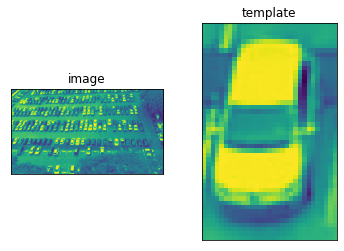

In [150]:
#imread(src, type ) disini make 0 artinya biar grayscale
img = cv2.resize(cv2.imread('/content/drive/MyDrive/PCVK/CAR/20.jpg', 0), (0, 0), fx=0.6, fy=0.6)
plt.imshow(img)

template = cv2.resize(cv2.imread('/content/drive/MyDrive/PCVK/model/car-model.jpg', 0), (0, 0), fx=0.8, fy=0.8)
plt.imshow(template)

display(img,template,'image','template')
h, w = template.shape

In [151]:
metode = cv2.TM_CCOEFF

In [152]:
img2 = img.copy()

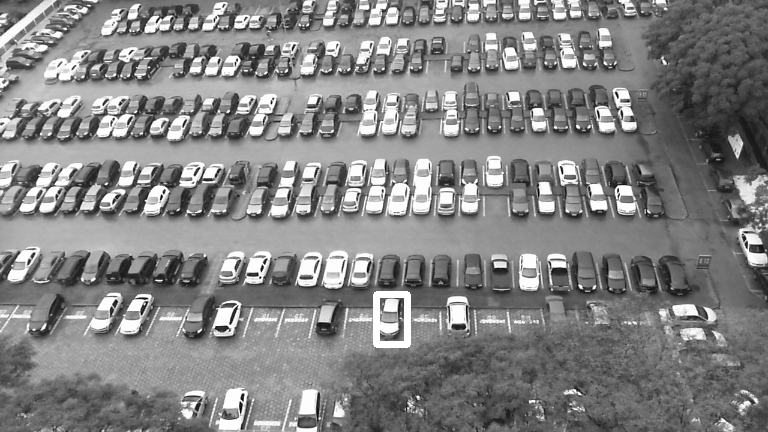

In [153]:
result = cv2.matchTemplate(img2, template, metode)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
location = max_loc
bottom_right = (location[0] + w, location[1] + h)    
cv2.rectangle(img2, location, bottom_right, 255, 5)
cv2_imshow(img2)

In [147]:
#declaring an array of method
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

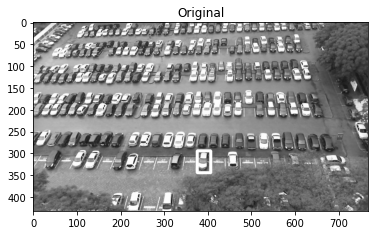

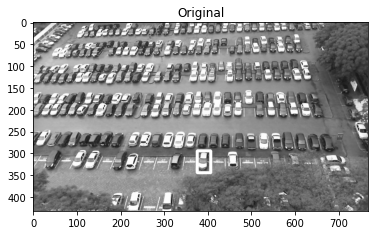

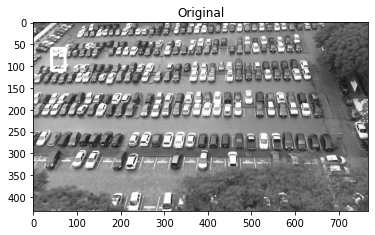

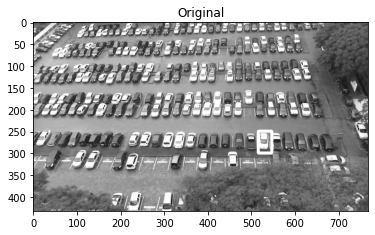

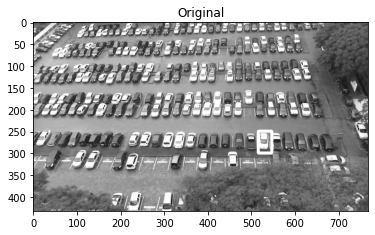

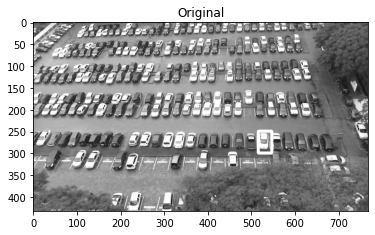

In [149]:
for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)    
    cv2.rectangle(img2, location, bottom_right, 255, 5)
    display_one(cv2.cvtColor(img2,method))

### **USING YOLO 3**

In [62]:
!wget "https://pjreddie.com/media/files/yolov3.weights"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2022-06-14 14:52:04--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  41.0MB/s    in 6.2s    

2022-06-14 14:52:11 (38.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2022-06-14 14:52:11--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      


In [119]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [120]:
# Loading image
img = cv2.imread('/content/drive/MyDrive/PCVK/CAR/20.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [121]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (1280, 1280), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)
car_counter = 0

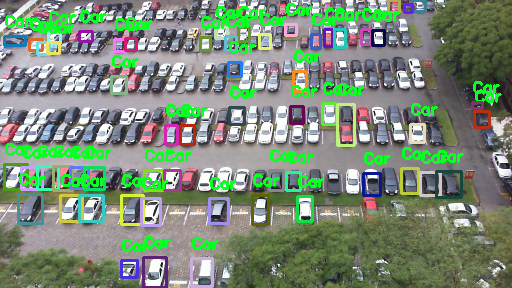

1


In [128]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            car_counter=+1
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        #Giving a label to each car detected
        cv2.putText(img, 'Car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)

cv2_imshow(img)
print(car_counter)